# Neural networks

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
features = np.array([[-100.1, 3240.10],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

In [4]:
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
print("Average:", round(features_standardized[:, 0].mean()))
print("Std:", round(features_standardized[:, 0].std()))

Average: 0
Std: 1


### Neural Network design

In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
# 2 layers neural network for classification (1 output layer with sigmoid activator)

In [9]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Binary classificator training

In [10]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

In [11]:
np.random.seed(0)

In [12]:
number_of_features = 1000

In [13]:
(data_train, target_train), (data_test, target_test), = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [14]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [15]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [16]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 3s 12ms/step - loss: 0.5321 - accuracy: 0.7252 - val_loss: 0.3411 - val_accuracy: 0.8550
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8591 - val_loss: 0.3320 - val_accuracy: 0.8595
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.8745 - val_loss: 0.3410 - val_accuracy: 0.8541


In [17]:
features_train.shape

(25000, 1000)

### Multiclass classificator training

In [18]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [19]:
np.random.seed(0)

In [20]:
number_of_features = 5000

In [21]:
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

In [22]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [23]:
network = models.Sequential()
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=100, activation="relu"))
network.add(layers.Dense(units=46, activation="softmax"))

In [24]:
network.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [25]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
90/90 [==============================] - 1s 11ms/step - loss: 2.0546 - accuracy: 0.5899 - val_loss: 1.1417 - val_accuracy: 0.7413
Epoch 2/3
90/90 [==============================] - 1s 8ms/step - loss: 0.8275 - accuracy: 0.8171 - val_loss: 0.9671 - val_accuracy: 0.7801
Epoch 3/3
90/90 [==============================] - 1s 8ms/step - loss: 0.5119 - accuracy: 0.8869 - val_loss: 0.9046 - val_accuracy: 0.7881


In [26]:
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Regressor training

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [28]:
np.random.seed(0)

In [29]:
features, target = make_regression(n_samples=10_000,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=0.0,
                                   random_state=0)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [31]:
network = models.Sequential()
network.add(layers.Dense(units=32, activation="relu", input_shape=(features_train.shape[1],)))
network.add(layers.Dense(units=32, activation="relu"))
network.add(layers.Dense(units=1))

In [32]:
network.compile(
    loss="mse",
    optimizer="RMSprop",
    metrics=["mse"])

In [33]:
history = network.fit(features_train, target_train, epochs=10, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/10
67/67 [==============================] - 1s 3ms/step - loss: 17039.2358 - mse: 17039.2349 - val_loss: 17644.1484 - val_mse: 17644.1484
Epoch 2/10
67/67 [==============================] - 0s 2ms/step - loss: 16396.0811 - mse: 16396.0811 - val_loss: 16346.5195 - val_mse: 16346.5195
Epoch 3/10
67/67 [==============================] - 0s 2ms/step - loss: 16086.8991 - mse: 16086.8993 - val_loss: 14173.4482 - val_mse: 14173.4482
Epoch 4/10
67/67 [==============================] - 0s 2ms/step - loss: 12976.0894 - mse: 12976.0894 - val_loss: 11165.7480 - val_mse: 11165.7480
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 9645.9021 - mse: 9645.9021 - val_loss: 7610.8184 - val_mse: 7610.8184
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 6405.7681 - mse: 6405.7681 - val_loss: 4181.5942 - val_mse: 4181.5942
Epoch 7/10
67/67 [==============================] - 0s 2ms/step - loss: 3267.8804 - mse: 3267.8804 - val_loss: 1643.5125 - val_mse: 

### Predictions

In [34]:
np.random.seed(0)

In [35]:
number_of_features = 10_000

In [36]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [37]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [38]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [39]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [40]:
history = network.fit(features_train, target_train, epochs=3, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 3s 9ms/step - loss: 0.4364 - accuracy: 0.8175 - val_loss: 0.2774 - val_accuracy: 0.8876
Epoch 2/3
250/250 [==============================] - 1s 6ms/step - loss: 0.1962 - accuracy: 0.9275 - val_loss: 0.2977 - val_accuracy: 0.8823
Epoch 3/3
250/250 [==============================] - 1s 6ms/step - loss: 0.1587 - accuracy: 0.9442 - val_loss: 0.3221 - val_accuracy: 0.8770


In [41]:
predicted_target = network.predict(features_test)

In [42]:
predicted_target[0]

array([0.07644513], dtype=float32)

### Training history visualization

In [43]:
import matplotlib.pyplot as plt

In [44]:
np.random.seed(0)

In [45]:
number_of_features = 10_000

In [46]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [47]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [48]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [49]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [50]:
history = network.fit(
    features_train,
    target_train,
    epochs=15,
    verbose=0,
    batch_size=1000,
    validation_data=(features_test, target_test))

In [51]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [52]:
epoch_count =  range(1, len(training_loss) + 1)

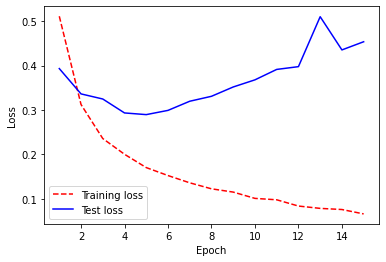

In [53]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

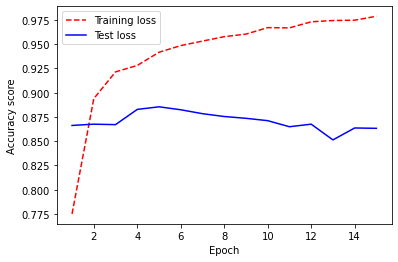

In [54]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

### Reducing overfitting by regularizing weights

In [55]:
from keras import regularizers

In [56]:
number_of_features = 1000

In [57]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [58]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [59]:
network = models.Sequential()
network.add(layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(number_of_features,)))
network.add(layers.Dense(
    units=16,
    kernel_regularizer=regularizers.l2(0.01),
    activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [60]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [61]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.7786 - accuracy: 0.7577 - val_loss: 0.4836 - val_accuracy: 0.8547
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.8583 - val_loss: 0.4373 - val_accuracy: 0.8571
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8589 - val_loss: 0.4236 - val_accuracy: 0.8580


### Reducing overfitting by early stop

In [62]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [63]:
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
             monitor="val_loss",
             save_best_only=True)]

In [64]:
history = network.fit(
    features_train,
    target_train,
    epochs=20,
    callbacks=callbacks,
    verbose=0,
    batch_size=100,
    validation_data=(features_test, target_test))

### Reducing overfitting by dropouts

In [65]:
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [66]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [67]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=0,
    batch_size=100,
    validation_data=(features_test, target_test))

### Saving of model training

In [68]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [69]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [70]:
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [71]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    callbacks=checkpoint,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.5262 - accuracy: 0.7445 - val_loss: 0.3443 - val_accuracy: 0.8548
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8656 - val_loss: 0.3284 - val_accuracy: 0.8609
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8685 - val_loss: 0.3270 - val_accuracy: 0.8591


### K-block cross-validation check of networks

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [73]:
number_of_features = 100

In [74]:
features, target = make_classification(n_samples=10_000,
                                       n_features=number_of_features,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.5, .5],
                                       random_state=0)

In [75]:
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return network

In [76]:
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

In [77]:
cross_val_score(neural_network, features, target, cv=3)

array([0.91121775, 0.89018899, 0.87968796])

### Fine tuning of neural networks

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return network

In [80]:
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

In [81]:
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

In [82]:
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
grid_result = grid.fit(features, target)

In [83]:
grid_result.best_params_

{'batch_size': 5, 'epochs': 5, 'optimizer': 'adam'}

### Network visualization

In [84]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [85]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

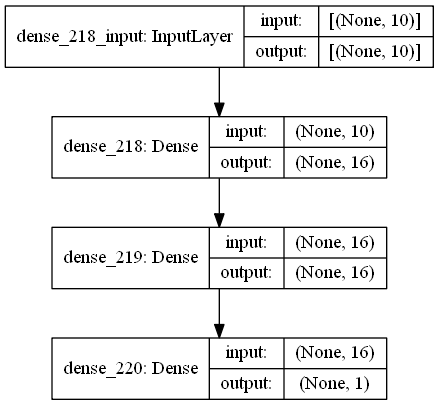

In [86]:
plot_model(network, show_shapes=True, to_file="network.png")